In [1]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

In [3]:
# proximal gradient method
def prox(w, q):
    w = w - w*(np.abs(w) <= q) - q*(w > q) + q*(w < -q)
    return w

In [4]:
# hyper parameter
A = np.array([[250, 15],
              [ 15,  4]])
mu = np.array([[1],
               [2]])
w_init = np.array([[ 3], [-1]])
lam = 0.5

In [5]:
# cvx
w_lasso = cv.Variable((2,1))
obj_fn = cv.quad_form(w_lasso - mu, A) +  lam * cv.norm(w_lasso, 1)
objective = cv.Minimize(obj_fn)
constraints = []
prob = cv.Problem(objective, constraints)
result = prob.solve(solver=cv.CVXOPT) 
w_lasso = w_lasso.value

In [6]:
# for ploting countour
X1, X2 = np.mgrid[-1:3:0.01, -2:3:0.02]
X = np.stack([X1-mu[0], X2-mu[1]], axis=2)
fValue = np.einsum('ijk, kl, ijl -> ij', X, A, X) + lam * (np.abs(X1) + np.abs(X2))

## AdaGrad

eta: 0.9865031720280106


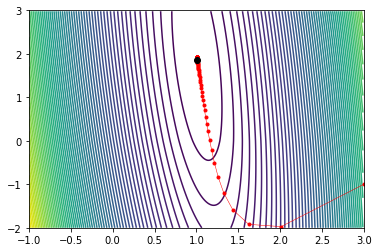

In [139]:
# AdaGrad
wt =w_init
L = 1.01 * np.max(np.linalg.eig(2 * A)[0])
eta = 500/L;
print(f'eta: {eta}')
eps = 1.0e-8
delta = 0.02;

w_history = []
fvalues = []
g_sum = np.zeros((2, 1))

for t in range(100):
    w_history.append(wt.T)
    grad = 2 * np.dot(A, wt-mu)
    g_sum += grad**2
    ht = np.sqrt(g_sum + eps)
    wt = wt - eta * (grad / ht)
    wt = prox(wt, lam * eta / ht)
w_history = np.vstack(w_history)

# plot
plt.contour(X1, X2, fValue, 80) # plot contour
plt.plot(w_history[:,0], w_history[:,1], 'ro-', markersize=3, linewidth=0.5)
plt.plot(w_lasso[0], w_lasso[1], 'ko')

plt.xlim(-1, 3)
plt.ylim(-2, 3)
plt.show()

## Adam

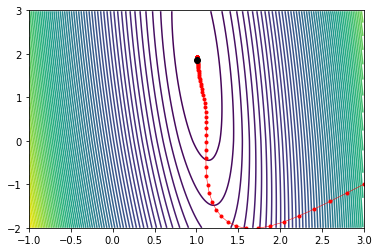

In [120]:
# Adam
wt = w_init
b1 = 0.7
b2 = 0.99999
eps = 1.0e-8
eta= 0.2

w_history = []
fvalues = []
mm = np.zeros((2,1))
vv = np.zeros((2,1))

for t in range(1,101):    
    w_history.append(wt.T)
    grad = 2 * np.dot(A, wt-mu)
    mm = b1*mm + (1-b1) * grad
    vv = b2*vv + (1-b2) * (grad**2)
    mmHat = mm / (1-b1**t)
    vvHat = vv / (1-b2**t)
    rateProx = eta / (np.sqrt(vvHat) + eps)

    wt = wt -  rateProx * mmHat
    wt = prox(wt, lam*rateProx)
w_history = np.vstack(w_history)

# plot
plt.contour(X1, X2, fValue, 80) # plot contour
plt.plot(w_history[:,0], w_history[:,1], 'ro-', markersize=3, linewidth=0.5)
plt.plot(w_lasso[0], w_lasso[1], 'ko')

plt.xlim(-1, 3)
plt.ylim(-2, 3)
plt.show()

## RMS Prop

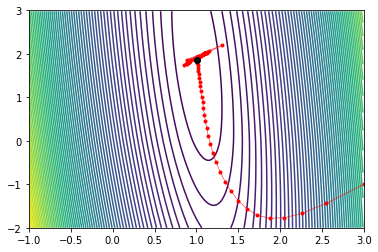

In [138]:
# RMS Prop
wt =w_init
eta = 0.2
eps = 1.0e-8
gamma = 0.8

w_history = []
fvalues = []
vv = np.zeros((2, 1))

for t in range(100):
    w_history.append(wt.T)
    grad = 2 * np.dot(A, wt-mu)
    vv = gamma*vv + (1-gamma) * grad**2
    ht = np.sqrt(vv + eps)
    wt = wt - eta / ht * grad
    wt = prox(wt, lam * eta / ht)
w_history = np.vstack(w_history)

# plot
plt.contour(X1, X2, fValue, 80) # plot contour
plt.plot(w_history[:,0], w_history[:,1], 'ro-', markersize=3, linewidth=0.5)
plt.plot(w_lasso[0], w_lasso[1], 'ko')

plt.xlim(-1, 3)
plt.ylim(-2, 3)
plt.show()

## AdaDelta

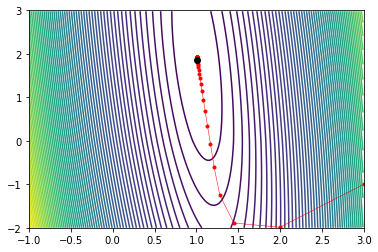

In [132]:
# prox update
def prox_update(w, q):
    upd = - w*(np.abs(w) <= q) - q*(w > q) + q*(w < -q)
    return upd

# RMS Prop
wt =w_init
eps = 1.0e-8
gamma = 0.95
eta = 1.0

w_history = []
fvalues = []
vv = np.zeros((2, 1))
ss = np.zeros((2, 1))
dwt = np.ones((2, 1)) * eta

for t in range(100):
    w_history.append(wt.T)
    grad = 2 * np.dot(A, wt-mu)
    vv = gamma*vv + (1-gamma) * grad**2
    ss = gamma*ss + (1-gamma) * dwt**2
    ht = np.sqrt(ss + eps) / np.sqrt(vv + eps)
    dwt = - ht*grad + prox_update(wt - ht*grad, lam*ht)
w_history = np.vstack(w_history)

# plot
plt.contour(X1, X2, fValue, 80) # plot contour
plt.plot(w_history[:,0], w_history[:,1], 'ro-', markersize=3, linewidth=0.5)
plt.plot(w_lasso[0], w_lasso[1], 'ko')

plt.xlim(-1, 3)
plt.ylim(-2, 3)
plt.show()

## NAdam

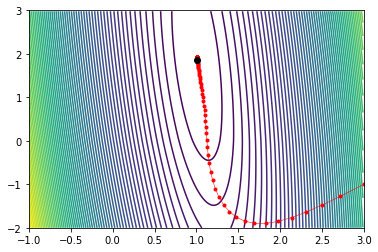

In [137]:
# Adam
wt = w_init
b1 = 0.7
b2 = 0.99999
eps = 1.0e-8
eta= 0.2

w_history = []
fvalues = []
mm = np.zeros((2,1))
vv = np.zeros((2,1))
b1_prod = b1

for t in range(1,101):    
    w_history.append(wt.T)
    grad = 2 * np.dot(A, wt-mu)
    mm = b1*mm + (1-b1) * grad
    vv = b2*vv + (1-b2) * (grad**2)
    mmHat = (1-b1)*grad / (1-b1_prod + eps)
    b1_prod *= b1
    mmHat += b1*mm / (1-b1_prod)
    vvHat = b2*vv / (1-b2**t)
    rateProx = eta / (np.sqrt(vvHat) + eps)

    wt = wt -  rateProx * mmHat
    wt = prox(wt, lam*rateProx)
w_history = np.vstack(w_history)

# plot
plt.contour(X1, X2, fValue, 80) # plot contour
plt.plot(w_history[:,0], w_history[:,1], 'ro-', markersize=3, linewidth=0.5)
plt.plot(w_lasso[0], w_lasso[1], 'ko')

plt.xlim(-1, 3)
plt.ylim(-2, 3)
plt.show()